# Dataset Information

#Overview

This dataset contains 1,000,000 anonymized credit card transactions with 7 input features and 1 label total 8 column.
Even though the dataset includes a fraud column, for unsupervised learning, this label will be ignored during training and used only for evaluation.

#Dataset Suitability for Unsupervised Learning

1) This dataset is excellent for unsupervised learning because:
2) Fraud cases are rare (8.7%), making this a classic anomaly detection problem.
3) Features describe behavioral patterns, allowing clustering or reconstruction-based anomaly detection.
4) All features are numerical, simplifying scaling and model training

# Import Liabraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Dataset

In [3]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# statistical info
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Preprocessing The Dataset

In [6]:
# check for null values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Exploratory Data Analysis (EDA)

In [7]:
df['fraud'].value_counts()


fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

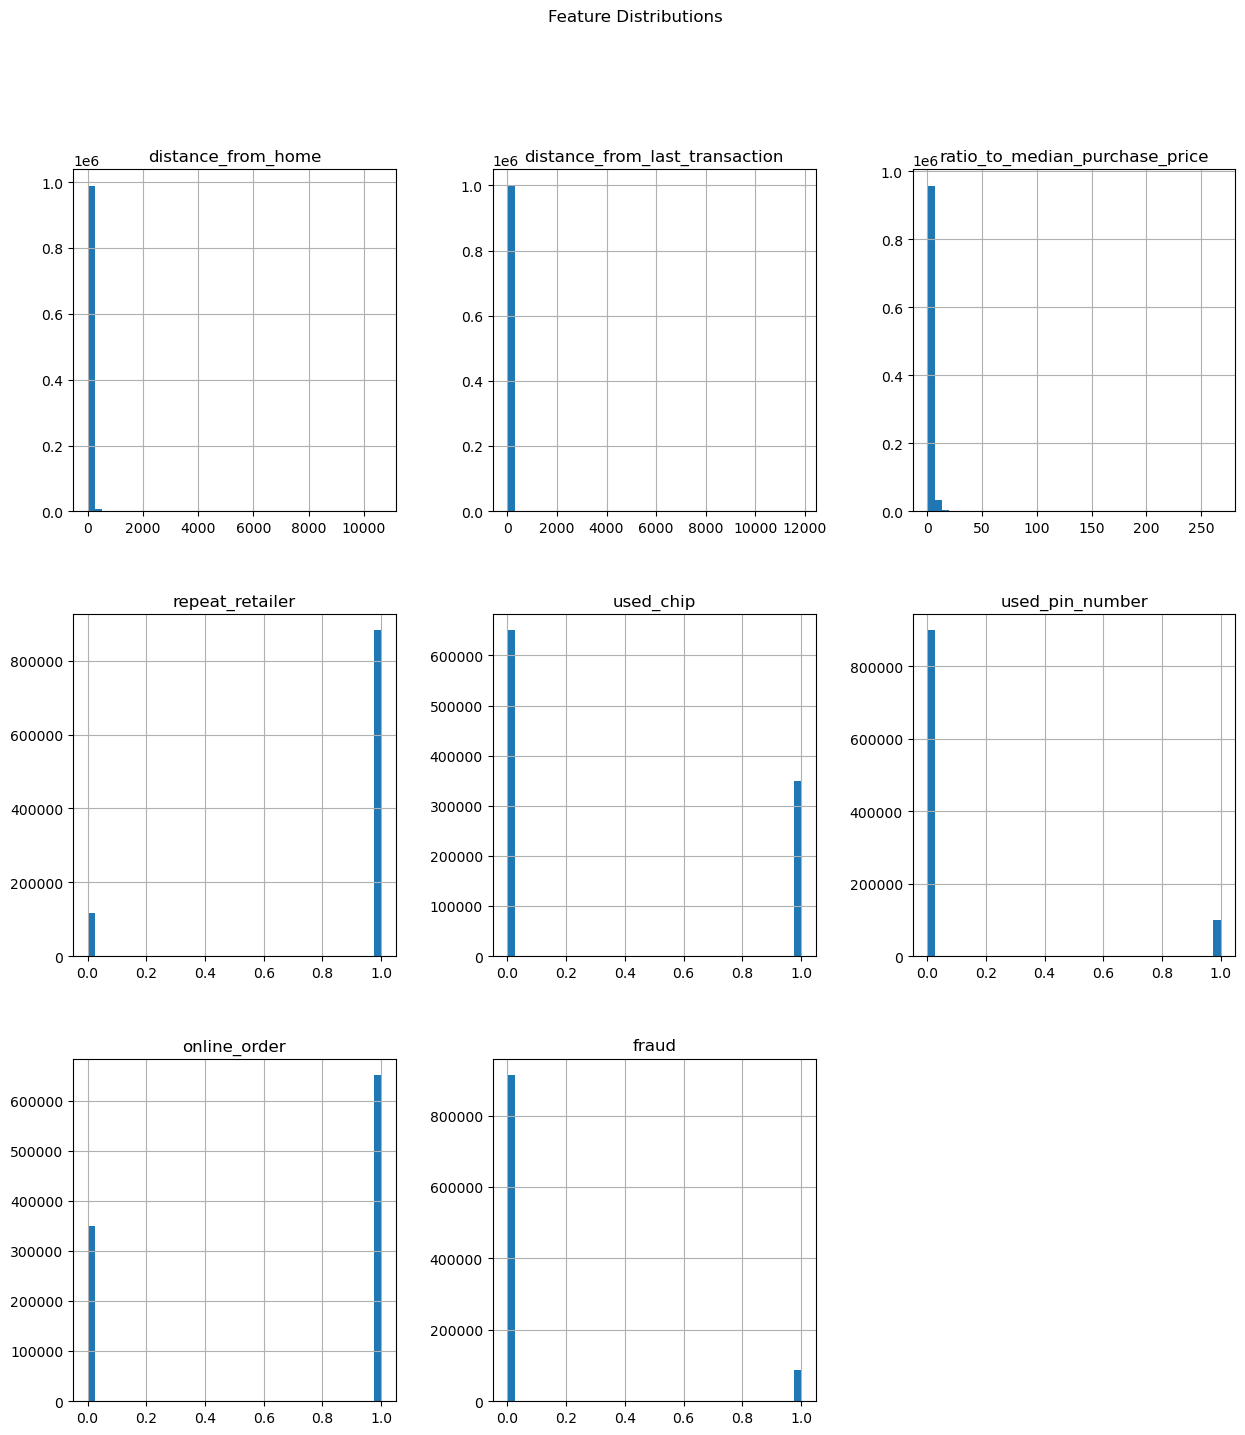

In [8]:
#Feature Distributions 
df.hist(figsize=(15,16), bins=40)
plt.suptitle("Feature Distributions")
plt.show()


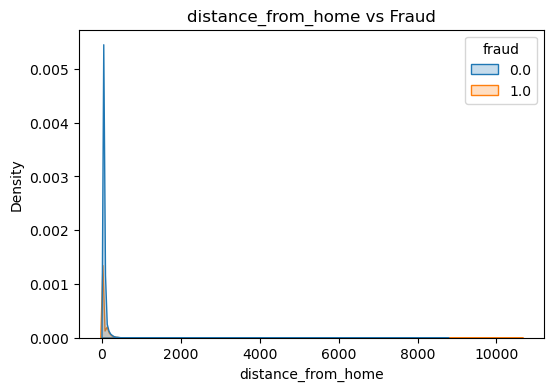

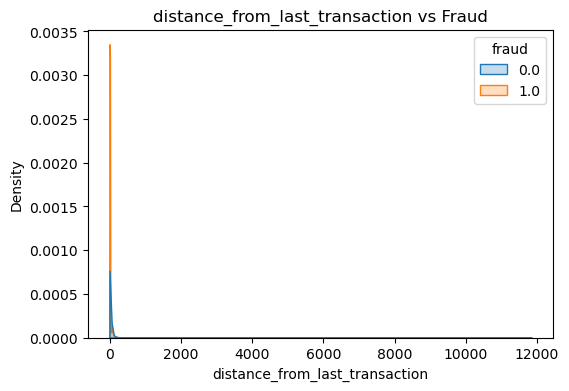

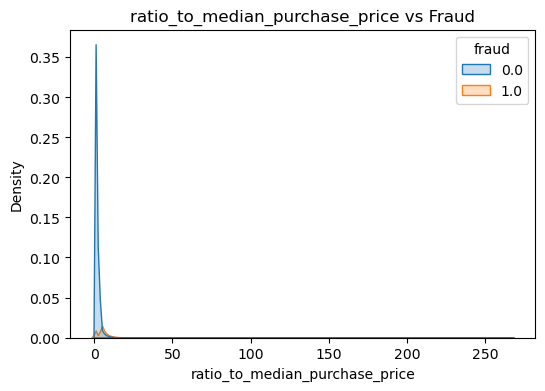

In [9]:
#Fraud vs. Transaction Behaviors
cols = ['distance_from_home', 'distance_from_last_transaction',
        'ratio_to_median_purchase_price']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='fraud', fill=True)
    plt.title(f"{col} vs Fraud")
    plt.show()


# Correlation Matrix

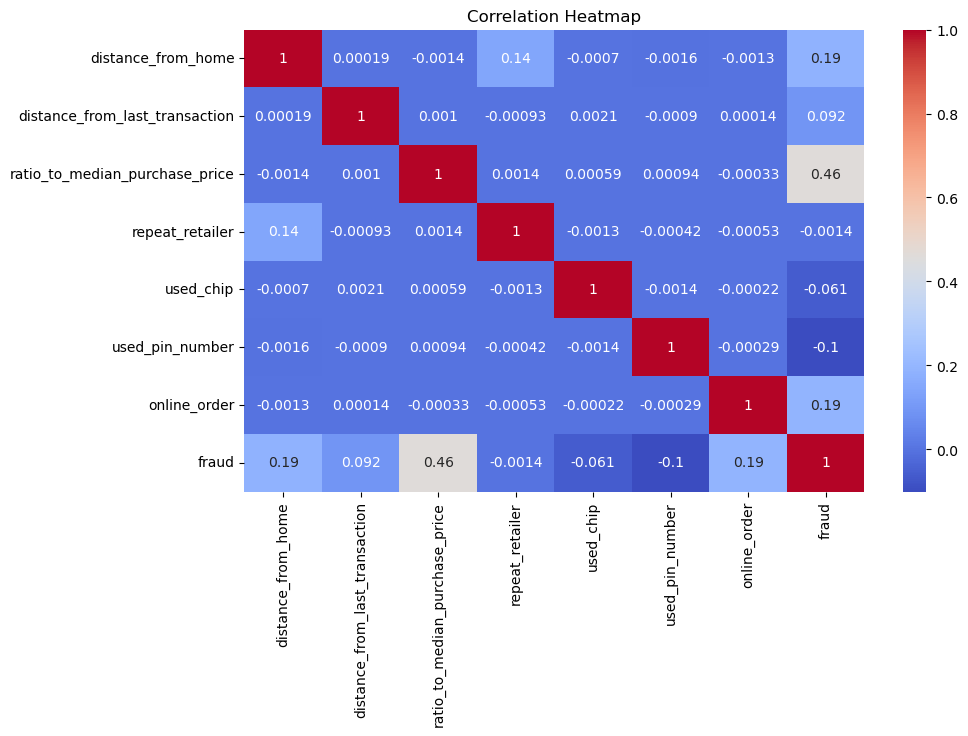

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Fea